<a href="https://colab.research.google.com/github/ommore86/Machine-Learning/blob/main/ML_6_Vanilla_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

# Step 2: Load Dataset
file_path = "/content/netflix_customer_churn.csv"  # Replace with actual filename if different
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (5000, 14)
                            customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0     

In [ ]:
# Step 3: Preprocessing
# Drop irrelevant columns (e.g., customer_id)
df.drop("customer_id", axis=1, inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop("churned", axis=1)
y = df["churned"]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: SVM Model (Linear Kernel)
model = SVC(kernel='linear', random_state=42)

# Step 6: Bias-Variance (Learning Curve)
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

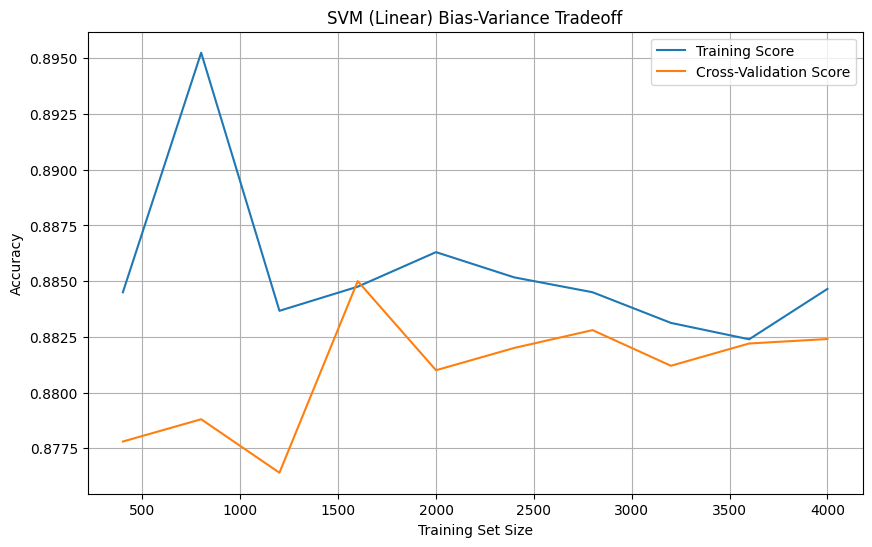

Fold scores: [0.878 0.89  0.885 0.872 0.889]
Average CV Accuracy: 0.8827999999999999


In [ ]:
# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("SVM (Linear) Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Fold scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))